<h1> K-Means clustering </h1>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
RS=0
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('retail_customer_segmentation.csv')
df.head()

,Income,Age,Recency,Amount_Wines,Amount_Fruits,Amount_SweetProducts,Amount_Meat_Fish,Web_Purchases,Store_Purchases
0,58138.0,53,58,635,88,88,718,8,4
1,46344.0,56,38,11,1,1,8,1,2
2,71613.0,45,26,426,49,21,238,8,10
3,26646.0,26,26,11,4,3,30,2,4
4,58293.0,29,94,173,43,27,164,5,6


In [5]:
df.shape

(1600, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1600 non-null   float64
 1   Age                   1600 non-null   int64  
 2   Recency               1600 non-null   int64  
 3   Amount_Wines          1600 non-null   int64  
 4   Amount_Fruits         1600 non-null   int64  
 5   Amount_SweetProducts  1600 non-null   int64  
 6   Amount_Meat_Fish      1600 non-null   int64  
 7   Web_Purchases         1600 non-null   int64  
 8   Store_Purchases       1600 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 112.6 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,1600.0,49040.192187,17982.928797,2447.0,35371.5,50008.0,64033.00,79946.0
Age,1600.0,41.596875,11.086362,21.0,33.0,40.0,51.00,70.0
Recency,1600.0,52.701875,27.056710,6.0,29.0,52.0,76.00,99.0
Amount_Wines,1600.0,278.280625,311.838641,0.0,24.0,161.0,452.25,1462.0
Amount_Fruits,1600.0,23.013125,35.793889,0.0,2.0,7.0,28.00,199.0
Amount_SweetProducts,1600.0,23.376875,37.253453,0.0,1.0,7.0,27.00,263.0
Amount_Meat_Fish,1600.0,166.484375,215.702360,6.0,22.0,71.0,227.25,1726.0
Web_Purchases,1600.0,4.159375,2.733568,0.0,2.0,4.0,6.00,27.0
Store_Purchases,1600.0,5.706875,3.139405,0.0,3.0,5.0,8.00,13.0


In [9]:
data = df.copy()

In [13]:
data.isnull().sum().sum()

0

In [15]:
data.duplicated().sum()

0

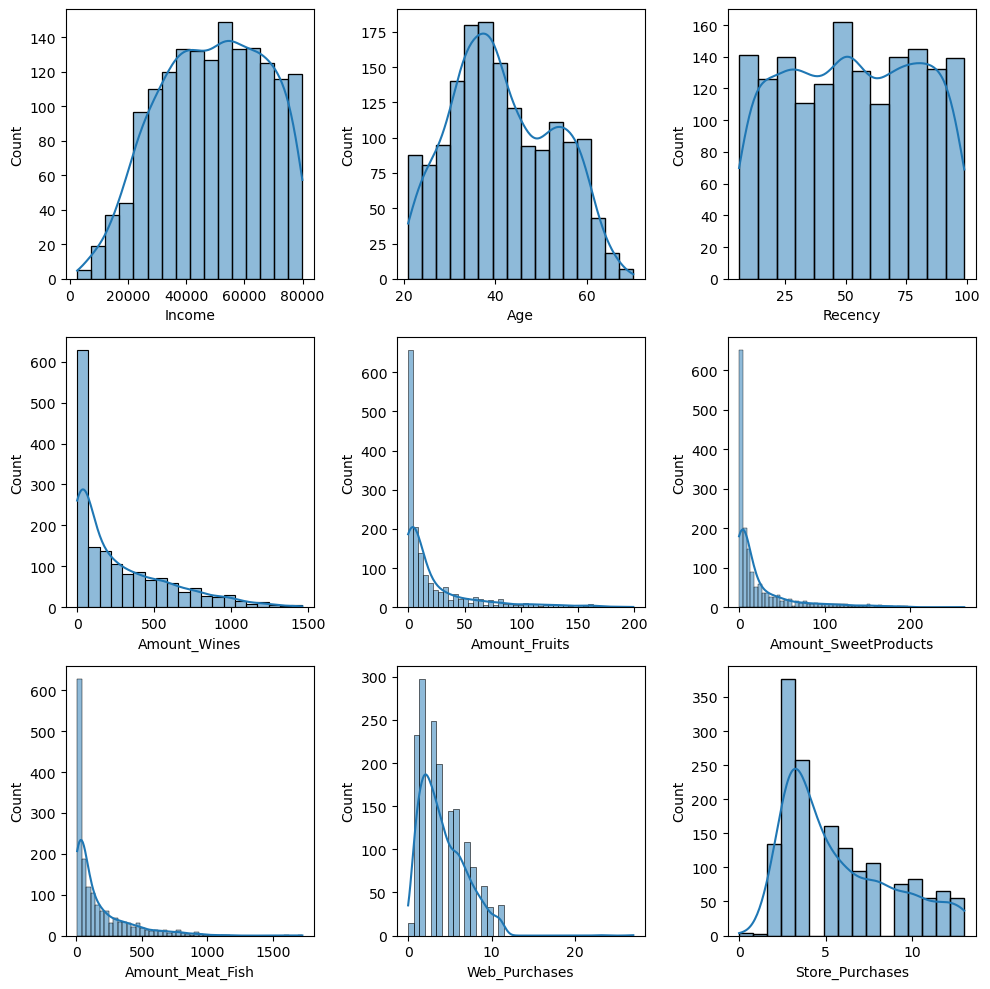

In [18]:
#univariate analysis
plt.figure(figsize=(10,10))
for i, col in enumerate(data.select_dtypes(include=[np.number]).columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=data, x=col, kde=True)
    plt.tight_layout()

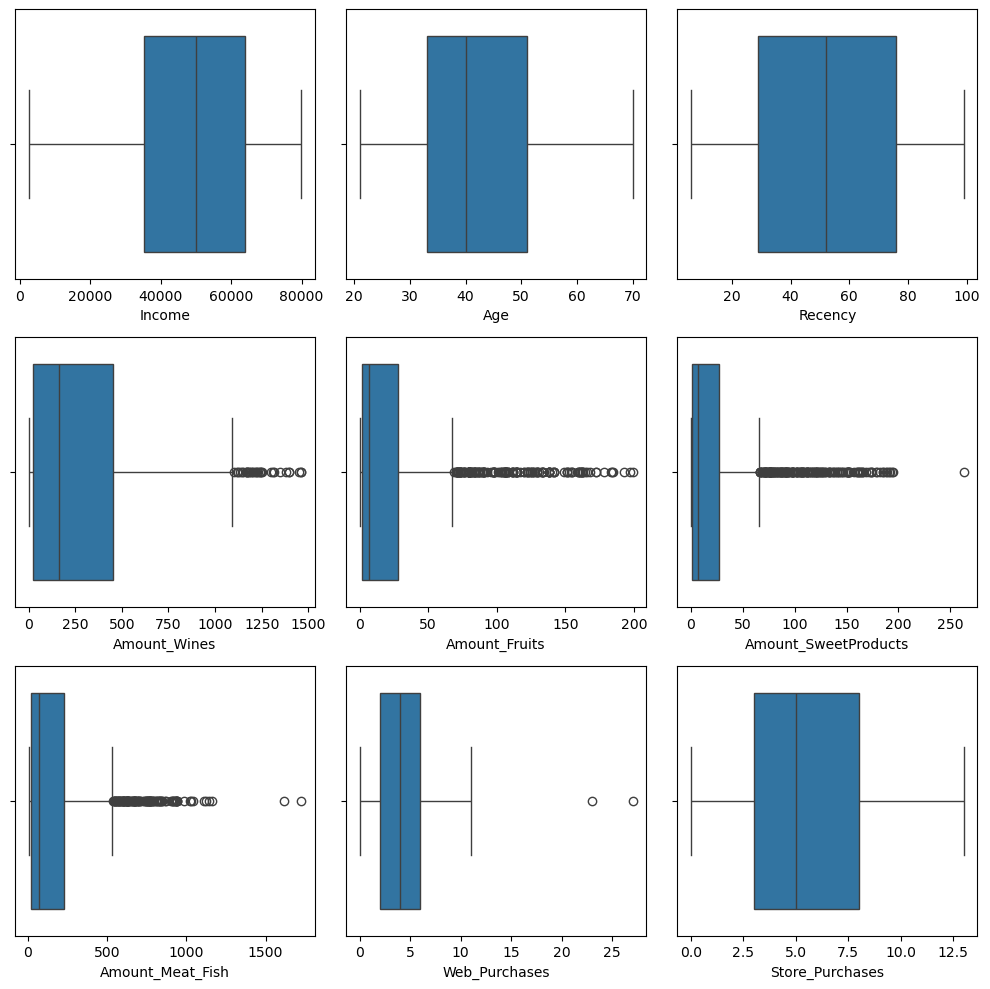

In [20]:
plt.figure(figsize=(10,10))
for i, col in enumerate(data.select_dtypes(include=[np.number]).columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data, x=col)
    plt.tight_layout()

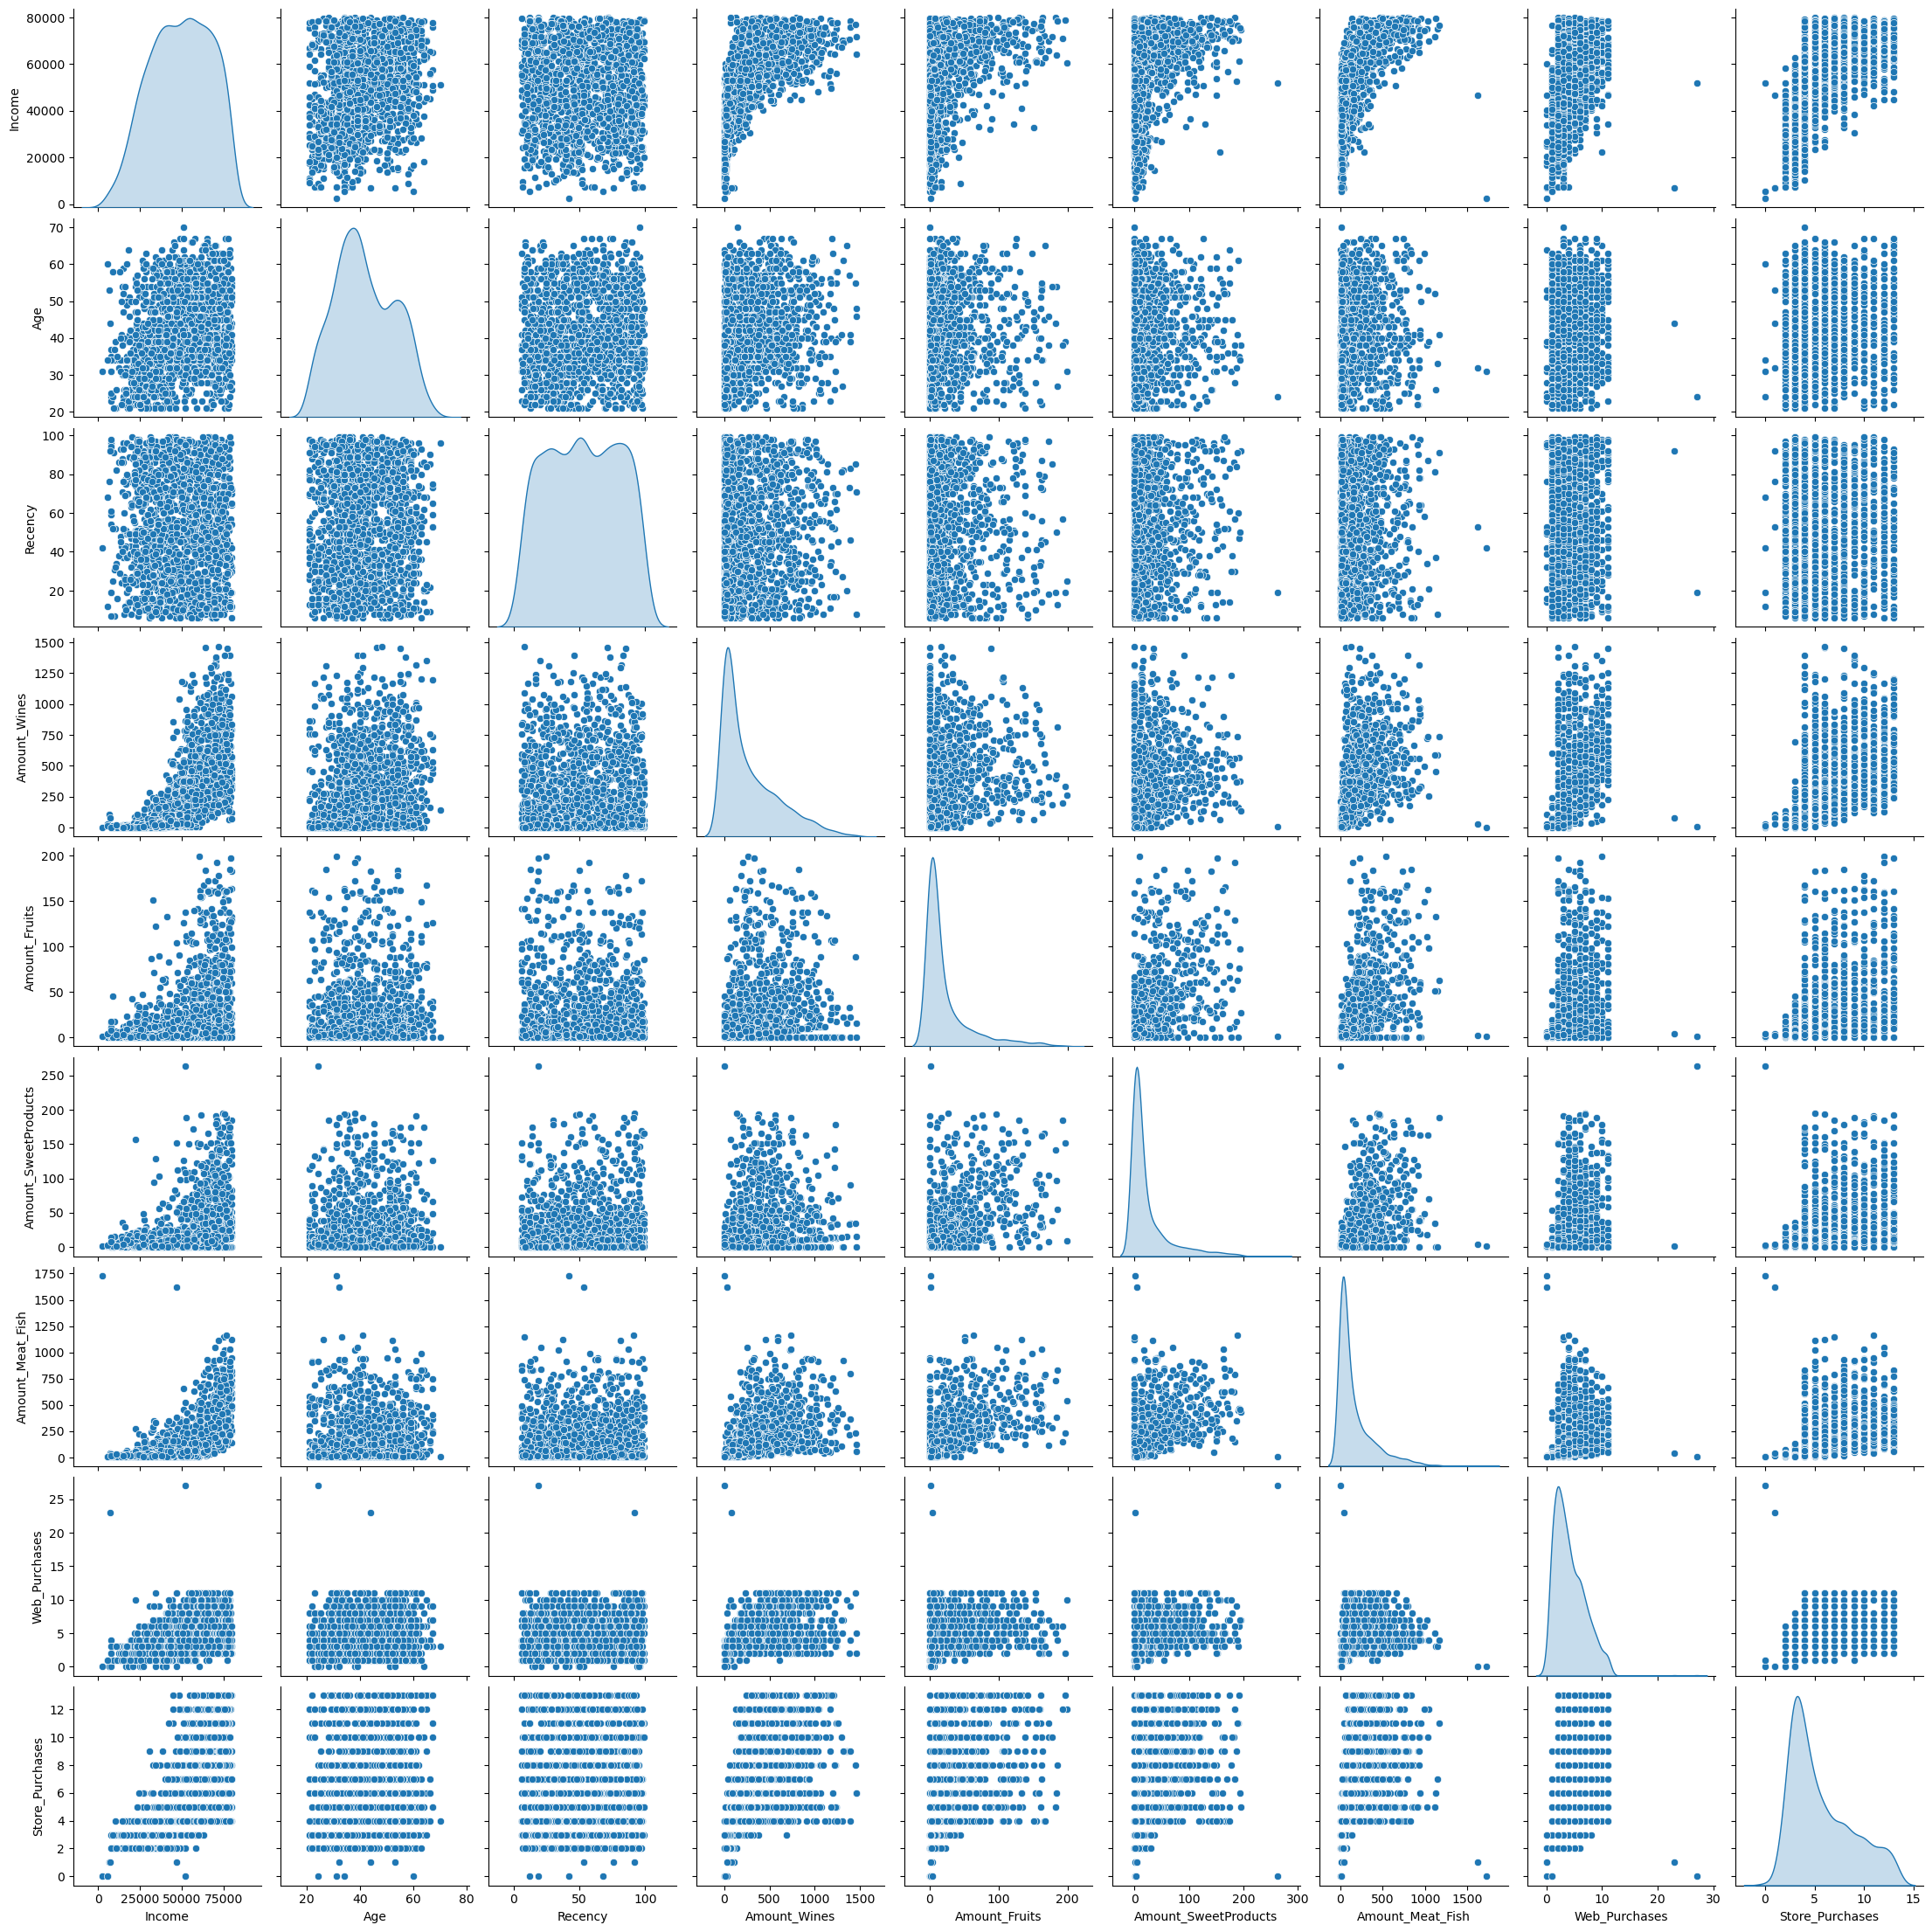

In [21]:
#pairplot
sns.pairplot(data=data, diag_kind='kde')

<Axes: >

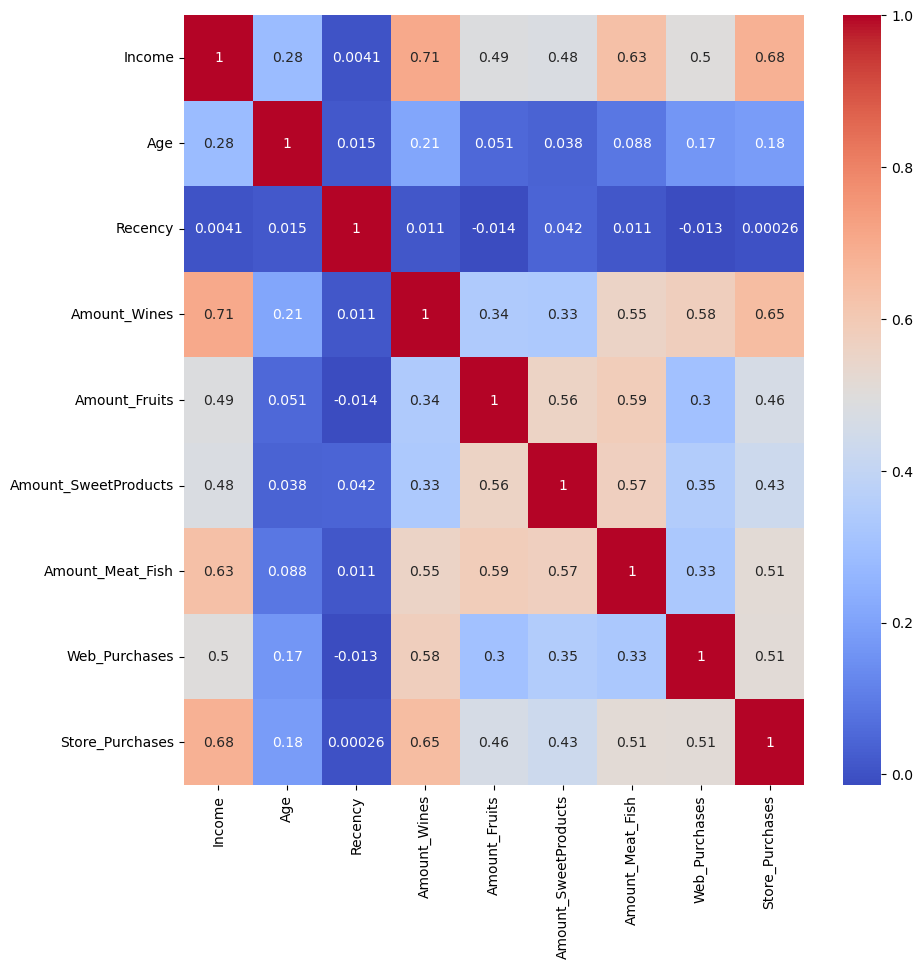

In [22]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [23]:
# initialize the standard scaler
scaler = StandardScaler()
# fit and transform the data
scaled_data = pd.DataFrame(scaler.fit_transform(data))
scaled_data.head()

,0,1,2,3,4,5,6,7,8
0,0.506072,1.028894,0.195877,1.144281,1.816153,1.735231,2.557636,1.405425,-0.543864
1,-0.149978,1.299581,-0.543542,-0.857380,-0.615189,-0.600854,-0.734966,-1.156131,-1.181126
2,1.255628,0.307061,-0.987194,0.473853,0.726241,-0.063823,0.331651,1.405425,1.367924
3,-1.245692,-1.407292,-0.987194,-0.857380,-0.531350,-0.547151,-0.632942,-0.790194,-0.543864
4,0.514694,-1.136605,1.526832,-0.337718,0.558562,0.097286,-0.011521,0.307615,0.093399


In [25]:
# initiating t-SNE model
# n_components = 2, means we want to reduce the dimensionality to 2
# n_jobs = -2, means we want to use all the cores except one
tsne = TSNE(n_components=2, n_jobs=-2, random_state=RS)

# fit and transform the data
tsne_data = tsne.fit_transform(scaled_data)

# converting the data to a DataFrame
tsne_df = pd.DataFrame(data=tsne_data, columns=['Feature1', 'Feature2'])

<Axes: xlabel='Feature1', ylabel='Feature2'>

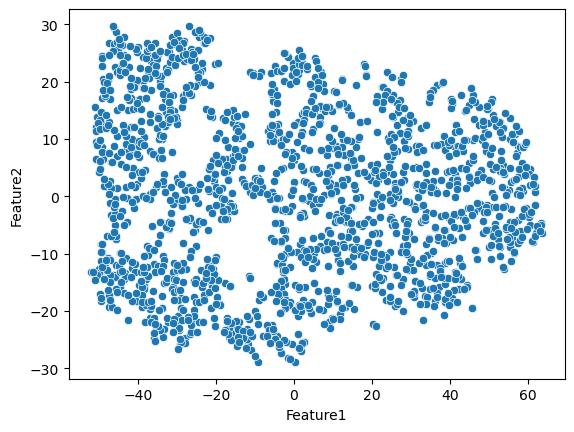

In [26]:
sns.scatterplot(data=tsne_df, x='Feature1', y='Feature2')

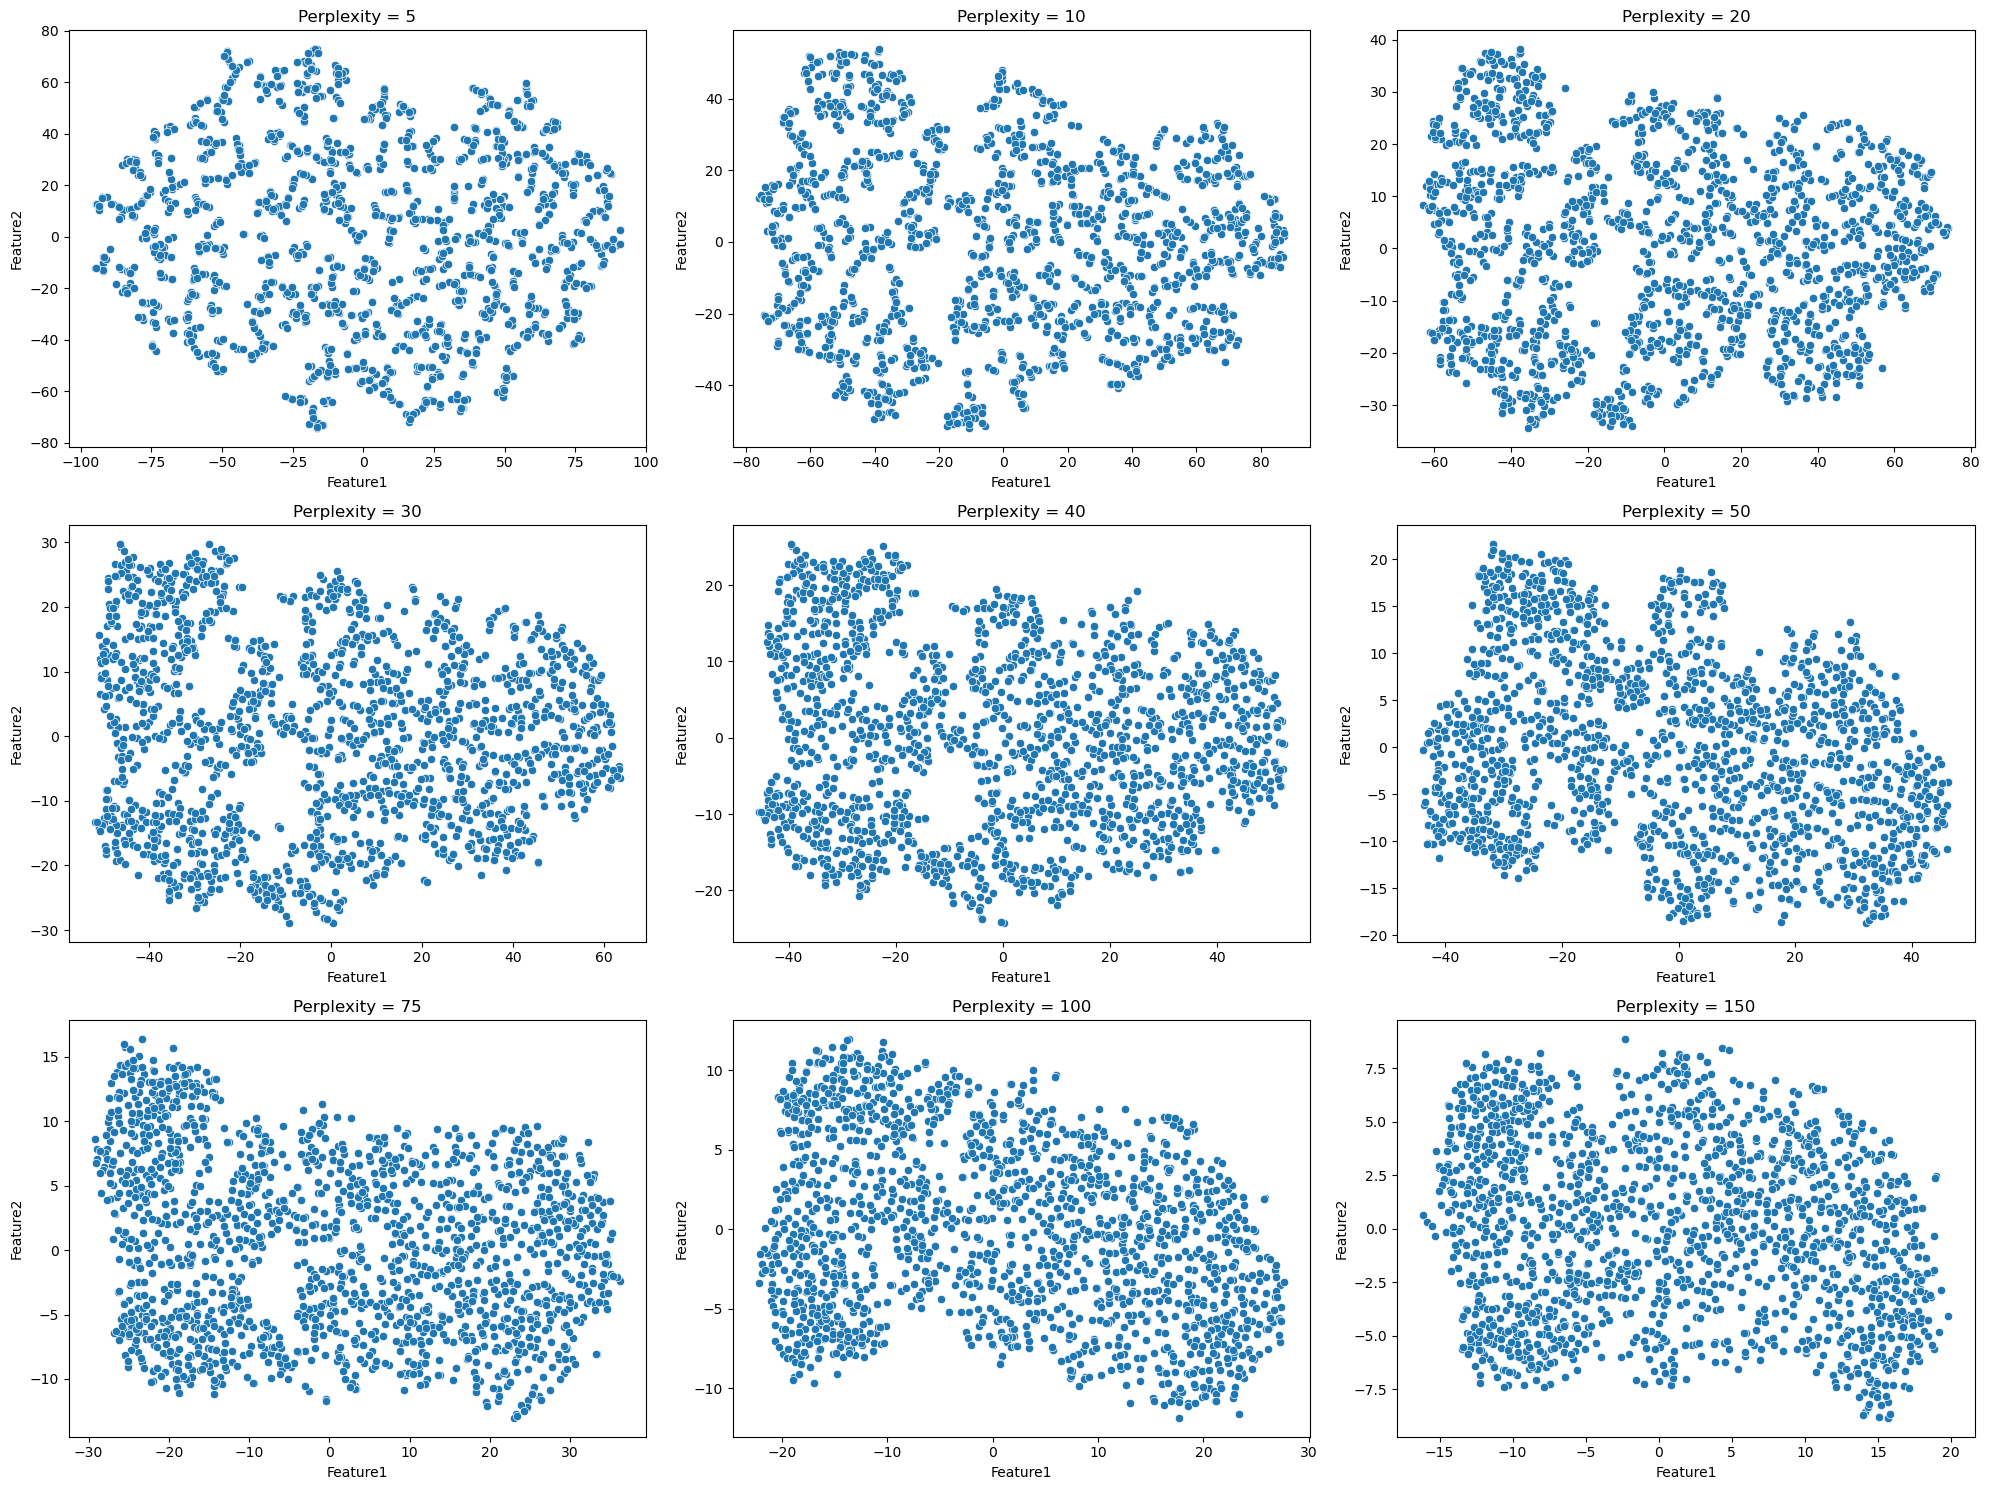

In [27]:
perplexity = [5, 10, 20, 30, 40, 50, 75, 100, 150]
plt.figure(figsize=(20, 15))
for i, perp in enumerate(perplexity):
    tsne = TSNE(n_components=2, n_jobs=-2, random_state=RS, perplexity=perp)
    tsne_data = tsne.fit_transform(scaled_data)
    tsne_df = pd.DataFrame(data=tsne_data, columns=['Feature1', 'Feature2'])
    plt.subplot(3, 3, i+1)
    sns.scatterplot(data=tsne_df, x='Feature1', y='Feature2')
    plt.title(f'Perplexity = {perp}')
    plt.tight_layout()